Car Price prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import plotly.express as px


Importing the dataset

In [2]:
df = pd.read_csv("Car_Price_Prediction.csv")

In [3]:
df

car_ID  symboling                   CarName fueltype aspiration  \
0         1          3        alfa-romero giulia      gas        std   
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
203     204         -1                 volvo 246   diesel      turbo   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0          two  convertible        rwd          front       88.6  ...   
1          two  convertible        rwd          front       88.6  ...   
2          two    hatchback        rwd          front       94.5  ...   
3         four        sedan        fwd          front       99.8  ...   
4         four        sedan        4wd          front       99.4  ...   
..         ...          ...        ...            ...        ...  ...   
200       four        sedan        rwd          front      109.1  ...   
201       four        sedan        rwd          front      109.1  ...   
202       four        sedan        rwd          front      109.1  ...   
203       four        sedan        rwd          front      109.1  ...   
204       four        sedan        rwd          front      109.1  ...   

     enginesize  fuelsystem  boreratio  stroke compressionratio horsepower  \
0           130        mpfi       3.47    2.68              9.0        111   
1           130        mpfi       3.47    2.68              9.0        111   
2           152        mpfi       2.68    3.47              9.0        154   
3           109        mpfi       3.19    3.40             10.0        102   
4           136        mpfi       3.19    3.40              8.0        115   
..          ...         ...        ...     ...              ...        ...   
200         141        mpfi       3.78    3.15              9.5        114   
201         141        mpfi       3.78    3.15              8.7        160   
202         173        mpfi       3.58    2.87              8.8        134   
203         145         idi       3.01    3.40             23.0        106   
204         141        mpfi       3.78    3.15              9.5        114   

     peakrpm citympg  highwaympg    price  
0       5000      21          27  13495.0  
1       5000      21          27  16500.0  
2       5000      19          26  16500.0  
3       5500      24          30  13950.0  
4       5500      18          22  17450.0  
..       ...     ...         ...      ...  
200     5400      23          28  16845.0  
201     5300      19          25  19045.0  
202     5500      18          23  21485.0  
203     4800      26          27  22470.0  
204     5400      19          25  22625.0  

[205 rows x 26 columns]

Checking co-rrelation between the columns

In [4]:
df.corr()

car_ID  symboling  wheelbase  carlength  carwidth  \
car_ID            1.000000  -0.151621   0.129729   0.170636  0.052387   
symboling        -0.151621   1.000000  -0.531954  -0.357612 -0.232919   
wheelbase         0.129729  -0.531954   1.000000   0.874587  0.795144   
carlength         0.170636  -0.357612   0.874587   1.000000  0.841118   
carwidth          0.052387  -0.232919   0.795144   0.841118  1.000000   
carheight         0.255960  -0.541038   0.589435   0.491029  0.279210   
curbweight        0.071962  -0.227691   0.776386   0.877728  0.867032   
enginesize       -0.033930  -0.105790   0.569329   0.683360  0.735433   
boreratio         0.260064  -0.130051   0.488750   0.606454  0.559150   
stroke           -0.160824  -0.008735   0.160959   0.129533  0.182942   
compressionratio  0.150276  -0.178515   0.249786   0.158414  0.181129   
horsepower       -0.015006   0.070873   0.353294   0.552623  0.640732   
peakrpm          -0.203789   0.273606  -0.360469  -0.287242 -0.220012   
citympg           0.015940  -0.035823  -0.470414  -0.670909 -0.642704   
highwaympg        0.011255   0.034606  -0.544082  -0.704662 -0.677218   
price            -0.109093  -0.079978   0.577816   0.682920  0.759325   

                  carheight  curbweight  enginesize  boreratio    stroke  \
car_ID             0.255960    0.071962   -0.033930   0.260064 -0.160824   
symboling         -0.541038   -0.227691   -0.105790  -0.130051 -0.008735   
wheelbase          0.589435    0.776386    0.569329   0.488750  0.160959   
carlength          0.491029    0.877728    0.683360   0.606454  0.129533   
carwidth           0.279210    0.867032    0.735433   0.559150  0.182942   
carheight          1.000000    0.295572    0.067149   0.171071 -0.055307   
curbweight         0.295572    1.000000    0.850594   0.648480  0.168790   
enginesize         0.067149    0.850594    1.000000   0.583774  0.203129   
boreratio          0.171071    0.648480    0.583774   1.000000 -0.055909   
stroke            -0.055307    0.168790    0.203129  -0.055909  1.000000   
compressionratio   0.261214    0.151362    0.028971   0.005197  0.186110   
horsepower        -0.108802    0.750739    0.809769   0.573677  0.080940   
peakrpm           -0.320411   -0.266243   -0.244660  -0.254976 -0.067964   
citympg           -0.048640   -0.757414   -0.653658  -0.584532 -0.042145   
highwaympg        -0.107358   -0.797465   -0.677470  -0.587012 -0.043931   
price              0.119336    0.835305    0.874145   0.553173  0.079443   

                  compressionratio  horsepower   peakrpm   citympg  \
car_ID                    0.150276   -0.015006 -0.203789  0.015940   
symboling                -0.178515    0.070873  0.273606 -0.035823   
wheelbase                 0.249786    0.353294 -0.360469 -0.470414   
carlength                 0.158414    0.552623 -0.287242 -0.670909   
carwidth                  0.181129    0.640732 -0.220012 -0.642704   
carheight                 0.261214   -0.108802 -0.320411 -0.048640   
curbweight                0.151362    0.750739 -0.266243 -0.757414   
enginesize                0.028971    0.809769 -0.244660 -0.653658   
boreratio                 0.005197    0.573677 -0.254976 -0.584532   
stroke                    0.186110    0.080940 -0.067964 -0.042145   
compressionratio          1.000000   -0.204326 -0.435741  0.324701   
horsepower               -0.204326    1.000000  0.131073 -0.801456   
peakrpm                  -0.435741    0.131073  1.000000 -0.113544   
citympg                   0.324701   -0.801456 -0.113544  1.000000   
highwaympg                0.265201   -0.770544 -0.054275  0.971337   
price                     0.067984    0.808139 -0.085267 -0.685751   

                  highwaympg     price  
car_ID              0.011255 -0.109093  
symboling           0.034606 -0.079978  
wheelbase          -0.544082  0.577816  
carlength          -0.704662  0.682920  
carwidth           -0.677218  0.759325  
carheight          -0.107358  0.119336  
curbwei

Checking correlation with the help of heatmap

<AxesSubplot:>

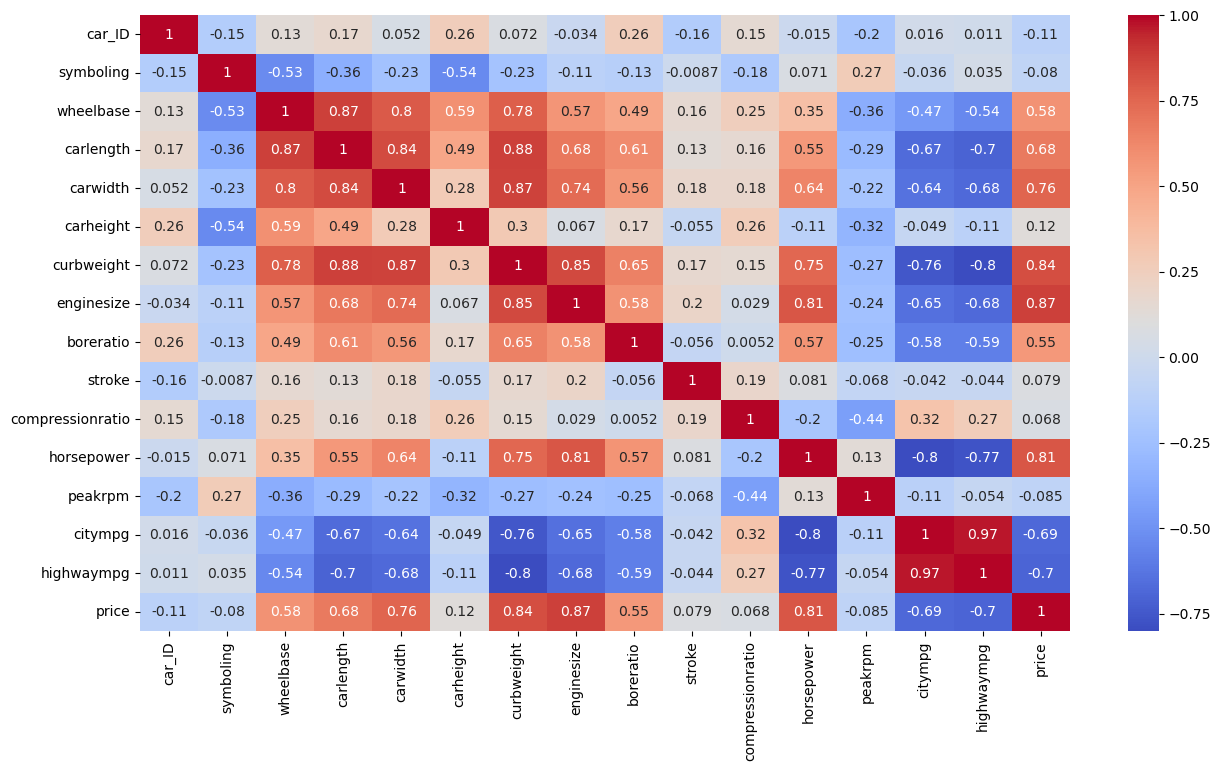

In [5]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot = True,cmap = 'coolwarm')

Spliting the brand name from CarName column and putting the same in new column named company

In [6]:
df['company']=df.CarName.str.split(' ').str[0]

In [7]:
df

car_ID  symboling                   CarName fueltype aspiration  \
0         1          3        alfa-romero giulia      gas        std   
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
203     204         -1                 volvo 246   diesel      turbo   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0          two  convertible        rwd          front       88.6  ...   
1          two  convertible        rwd          front       88.6  ...   
2          two    hatchback        rwd          front       94.5  ...   
3         four        sedan        fwd          front       99.8  ...   
4         four        sedan        4wd          front       99.4  ...   
..         ...          ...        ...            ...        ...  ...   
200       four        sedan        rwd          front      109.1  ...   
201       four        sedan        rwd          front      109.1  ...   
202       four        sedan        rwd          front      109.1  ...   
203       four        sedan        rwd          front      109.1  ...   
204       four        sedan        rwd          front      109.1  ...   

     fuelsystem  boreratio  stroke  compressionratio horsepower peakrpm  \
0          mpfi       3.47    2.68               9.0        111    5000   
1          mpfi       3.47    2.68               9.0        111    5000   
2          mpfi       2.68    3.47               9.0        154    5000   
3          mpfi       3.19    3.40              10.0        102    5500   
4          mpfi       3.19    3.40               8.0        115    5500   
..          ...        ...     ...               ...        ...     ...   
200        mpfi       3.78    3.15               9.5        114    5400   
201        mpfi       3.78    3.15               8.7        160    5300   
202        mpfi       3.58    2.87               8.8        134    5500   
203         idi       3.01    3.40              23.0        106    4800   
204        mpfi       3.78    3.15               9.5        114    5400   

     citympg highwaympg    price      company  
0         21         27  13495.0  alfa-romero  
1         21         27  16500.0  alfa-romero  
2         19         26  16500.0  alfa-romero  
3         24         30  13950.0         audi  
4         18         22  17450.0         audi  
..       ...        ...      ...          ...  
200       23         28  16845.0        volvo  
201       19         25  19045.0        volvo  
202       18         23  21485.0        volvo  
203       26         27  22470.0        volvo  
204       19         25  22625.0        volvo  

[205 rows x 27 columns]

Replacing the wrong company name with the correct company name

In [8]:
df['company'].replace('maxda','mazda',inplace=True)
df['company'].replace('Nissan','nissan',inplace=True)
df['company'].replace('porsche','porcshce',inplace=True)
df['company'].replace('toyota','toyouta',inplace=True)
df['company'].replace('vokswagen','volkswagen',inplace=True)

In [9]:
df.company.value_counts()

toyouta        32
nissan         18
mazda          17
mitsubishi     13
honda          13
subaru         12
peugeot        11
volvo          11
volkswagen     10
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porcshce        5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
vw              2
mercury         1
Name: company, dtype: int64

In [10]:
df.var()

C:\Users\Gaurav\AppData\Local\Temp\ipykernel_10264\1568254755.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.var()


car_ID              3.519167e+03
symboling           1.550789e+00
wheelbase           3.626178e+01
carlength           1.522087e+02
carwidth            4.601900e+00
carheight           5.970800e+00
curbweight          2.711079e+05
enginesize          1.734114e+03
boreratio           7.335631e-02
stroke              9.834309e-02
compressionratio    1.577710e+01
horsepower          1.563741e+03
peakrpm             2.275153e+05
citympg             4.279962e+01
highwaympg          4.742310e+01
price               6.382176e+07
dtype: float64

Using visualization method to compare the datasets

<AxesSubplot:xlabel='price', ylabel='count'>

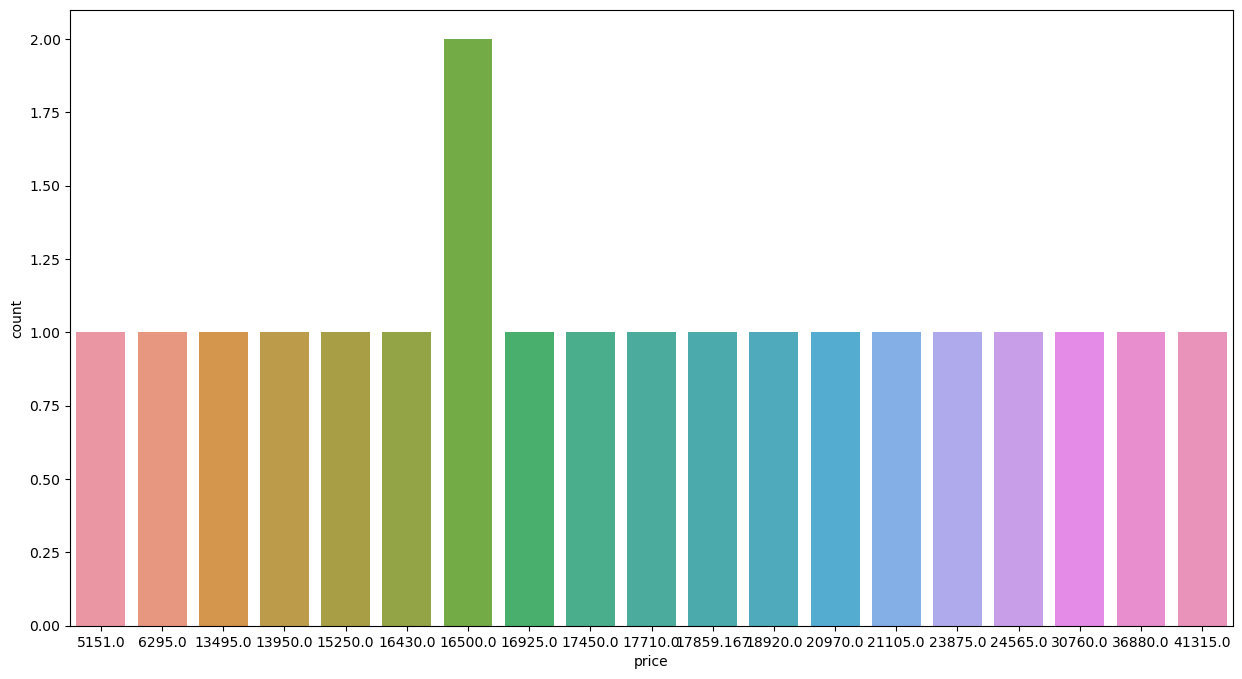

In [11]:
plt.figure(figsize=(15,8))
sns.countplot(x='price',data=df.head(20))

<AxesSubplot:xlabel='price'>

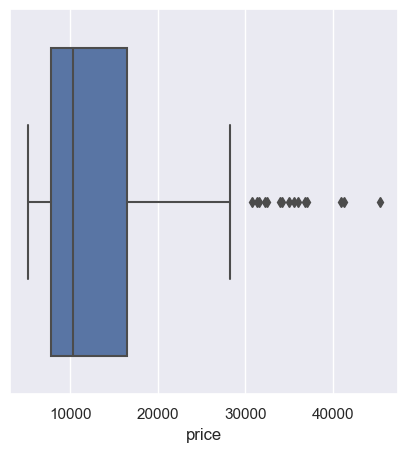

In [12]:
sns.set(rc={"figure.figsize":(5, 5)})
sns.boxplot(x='price',data=df)



<AxesSubplot:xlabel='company', ylabel='count'>

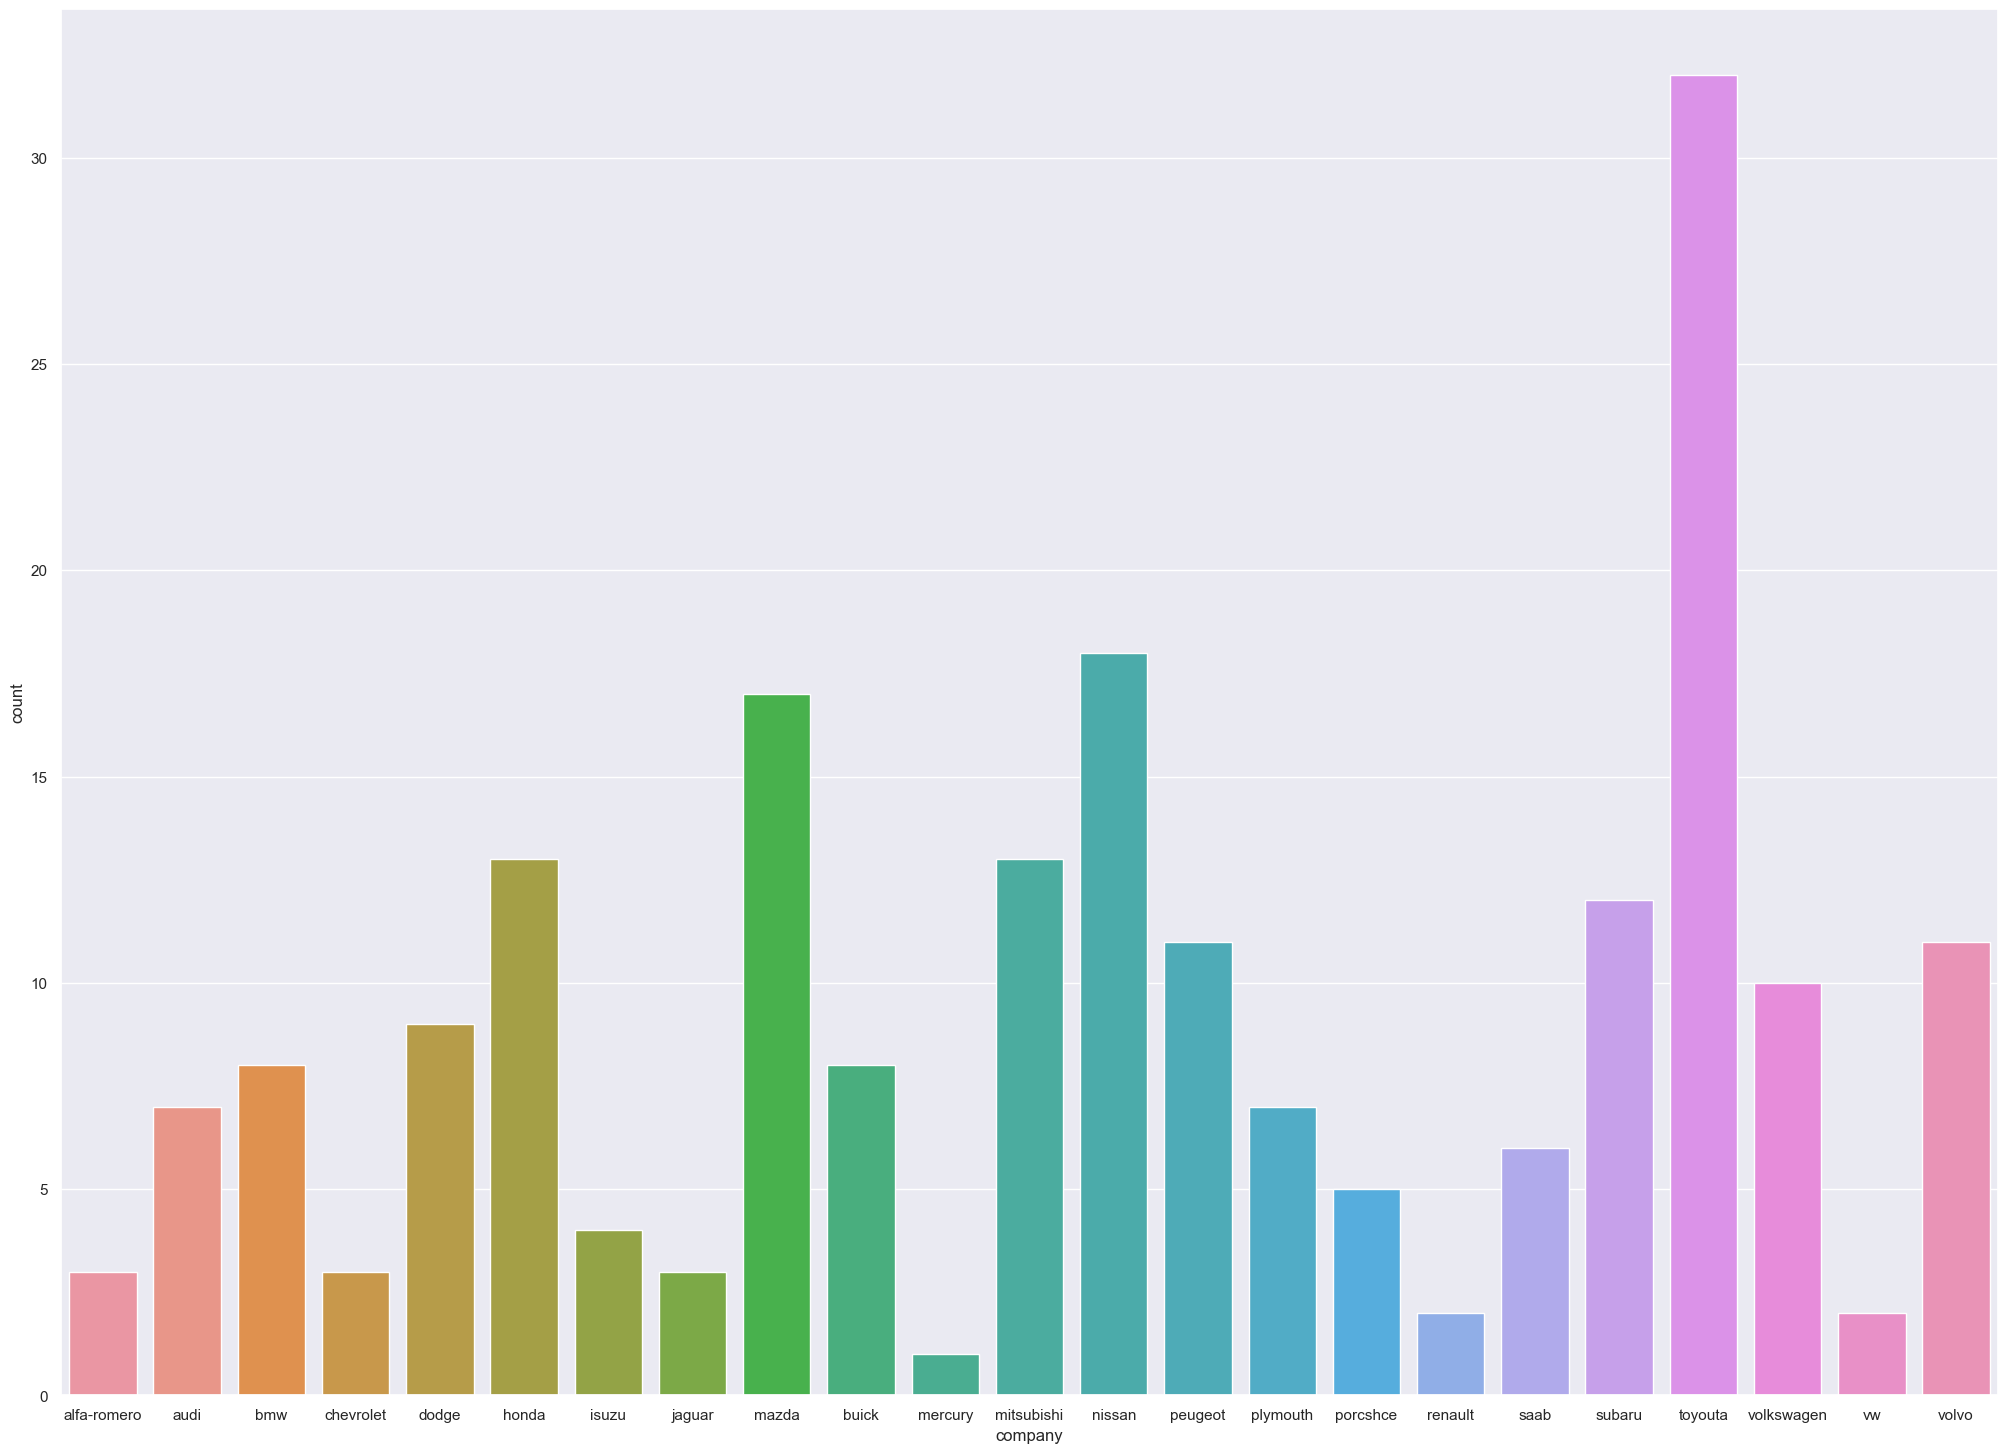

In [13]:
plt.figure(figsize=(25,18))
sns.countplot(x='company',data=df)

<AxesSubplot:xlabel='fueltype', ylabel='count'>

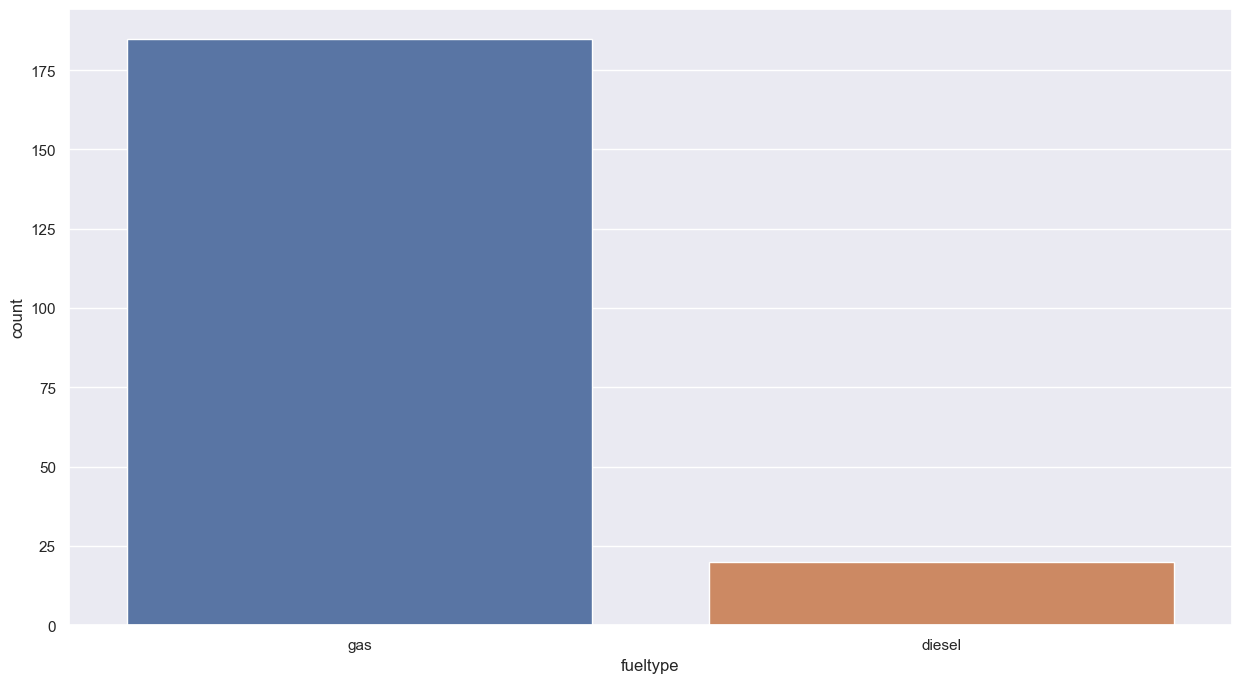

In [14]:
plt.figure(figsize=(15,8))
sns.countplot(x='fueltype',data=df)

In [15]:
plt.figure(figsize=(100,100))
px.bar(df,x='company',y ='fueltype',width=800, height=400)


<Figure size 10000x10000 with 0 Axes>

<AxesSubplot:xlabel='enginetype', ylabel='count'>

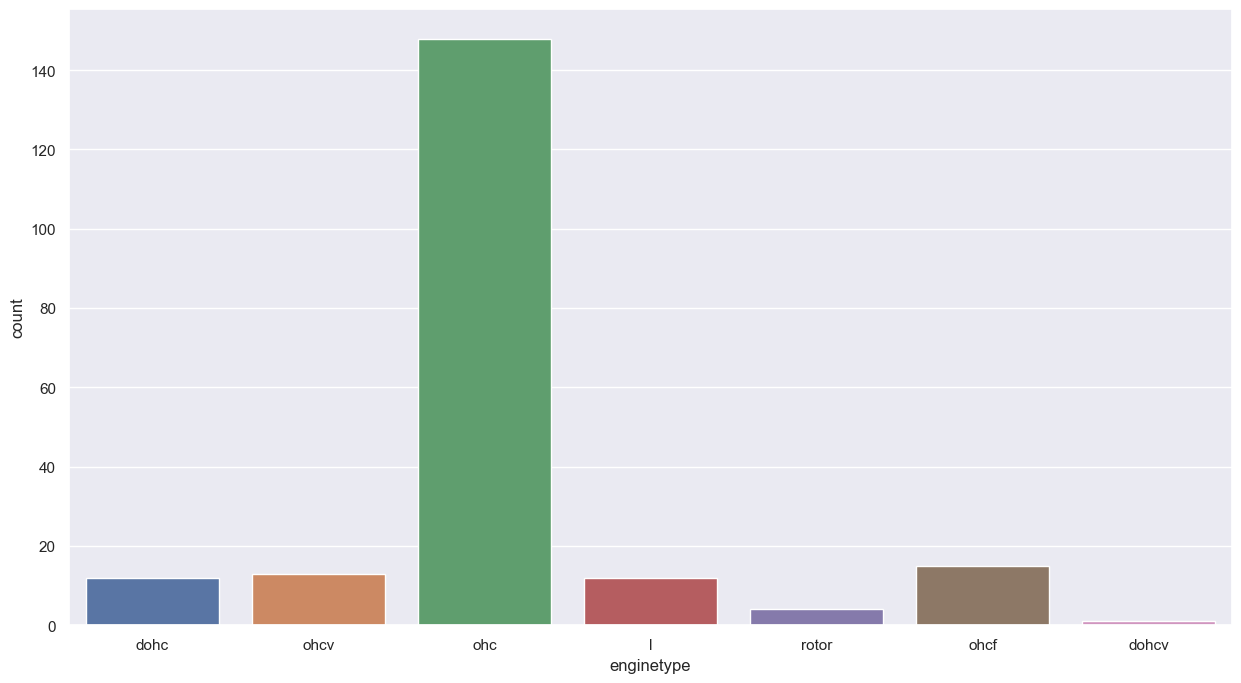

In [16]:
plt.figure(figsize=(15,8))
sns.countplot(x='enginetype',data=df)

<AxesSubplot:xlabel='company', ylabel='price'>

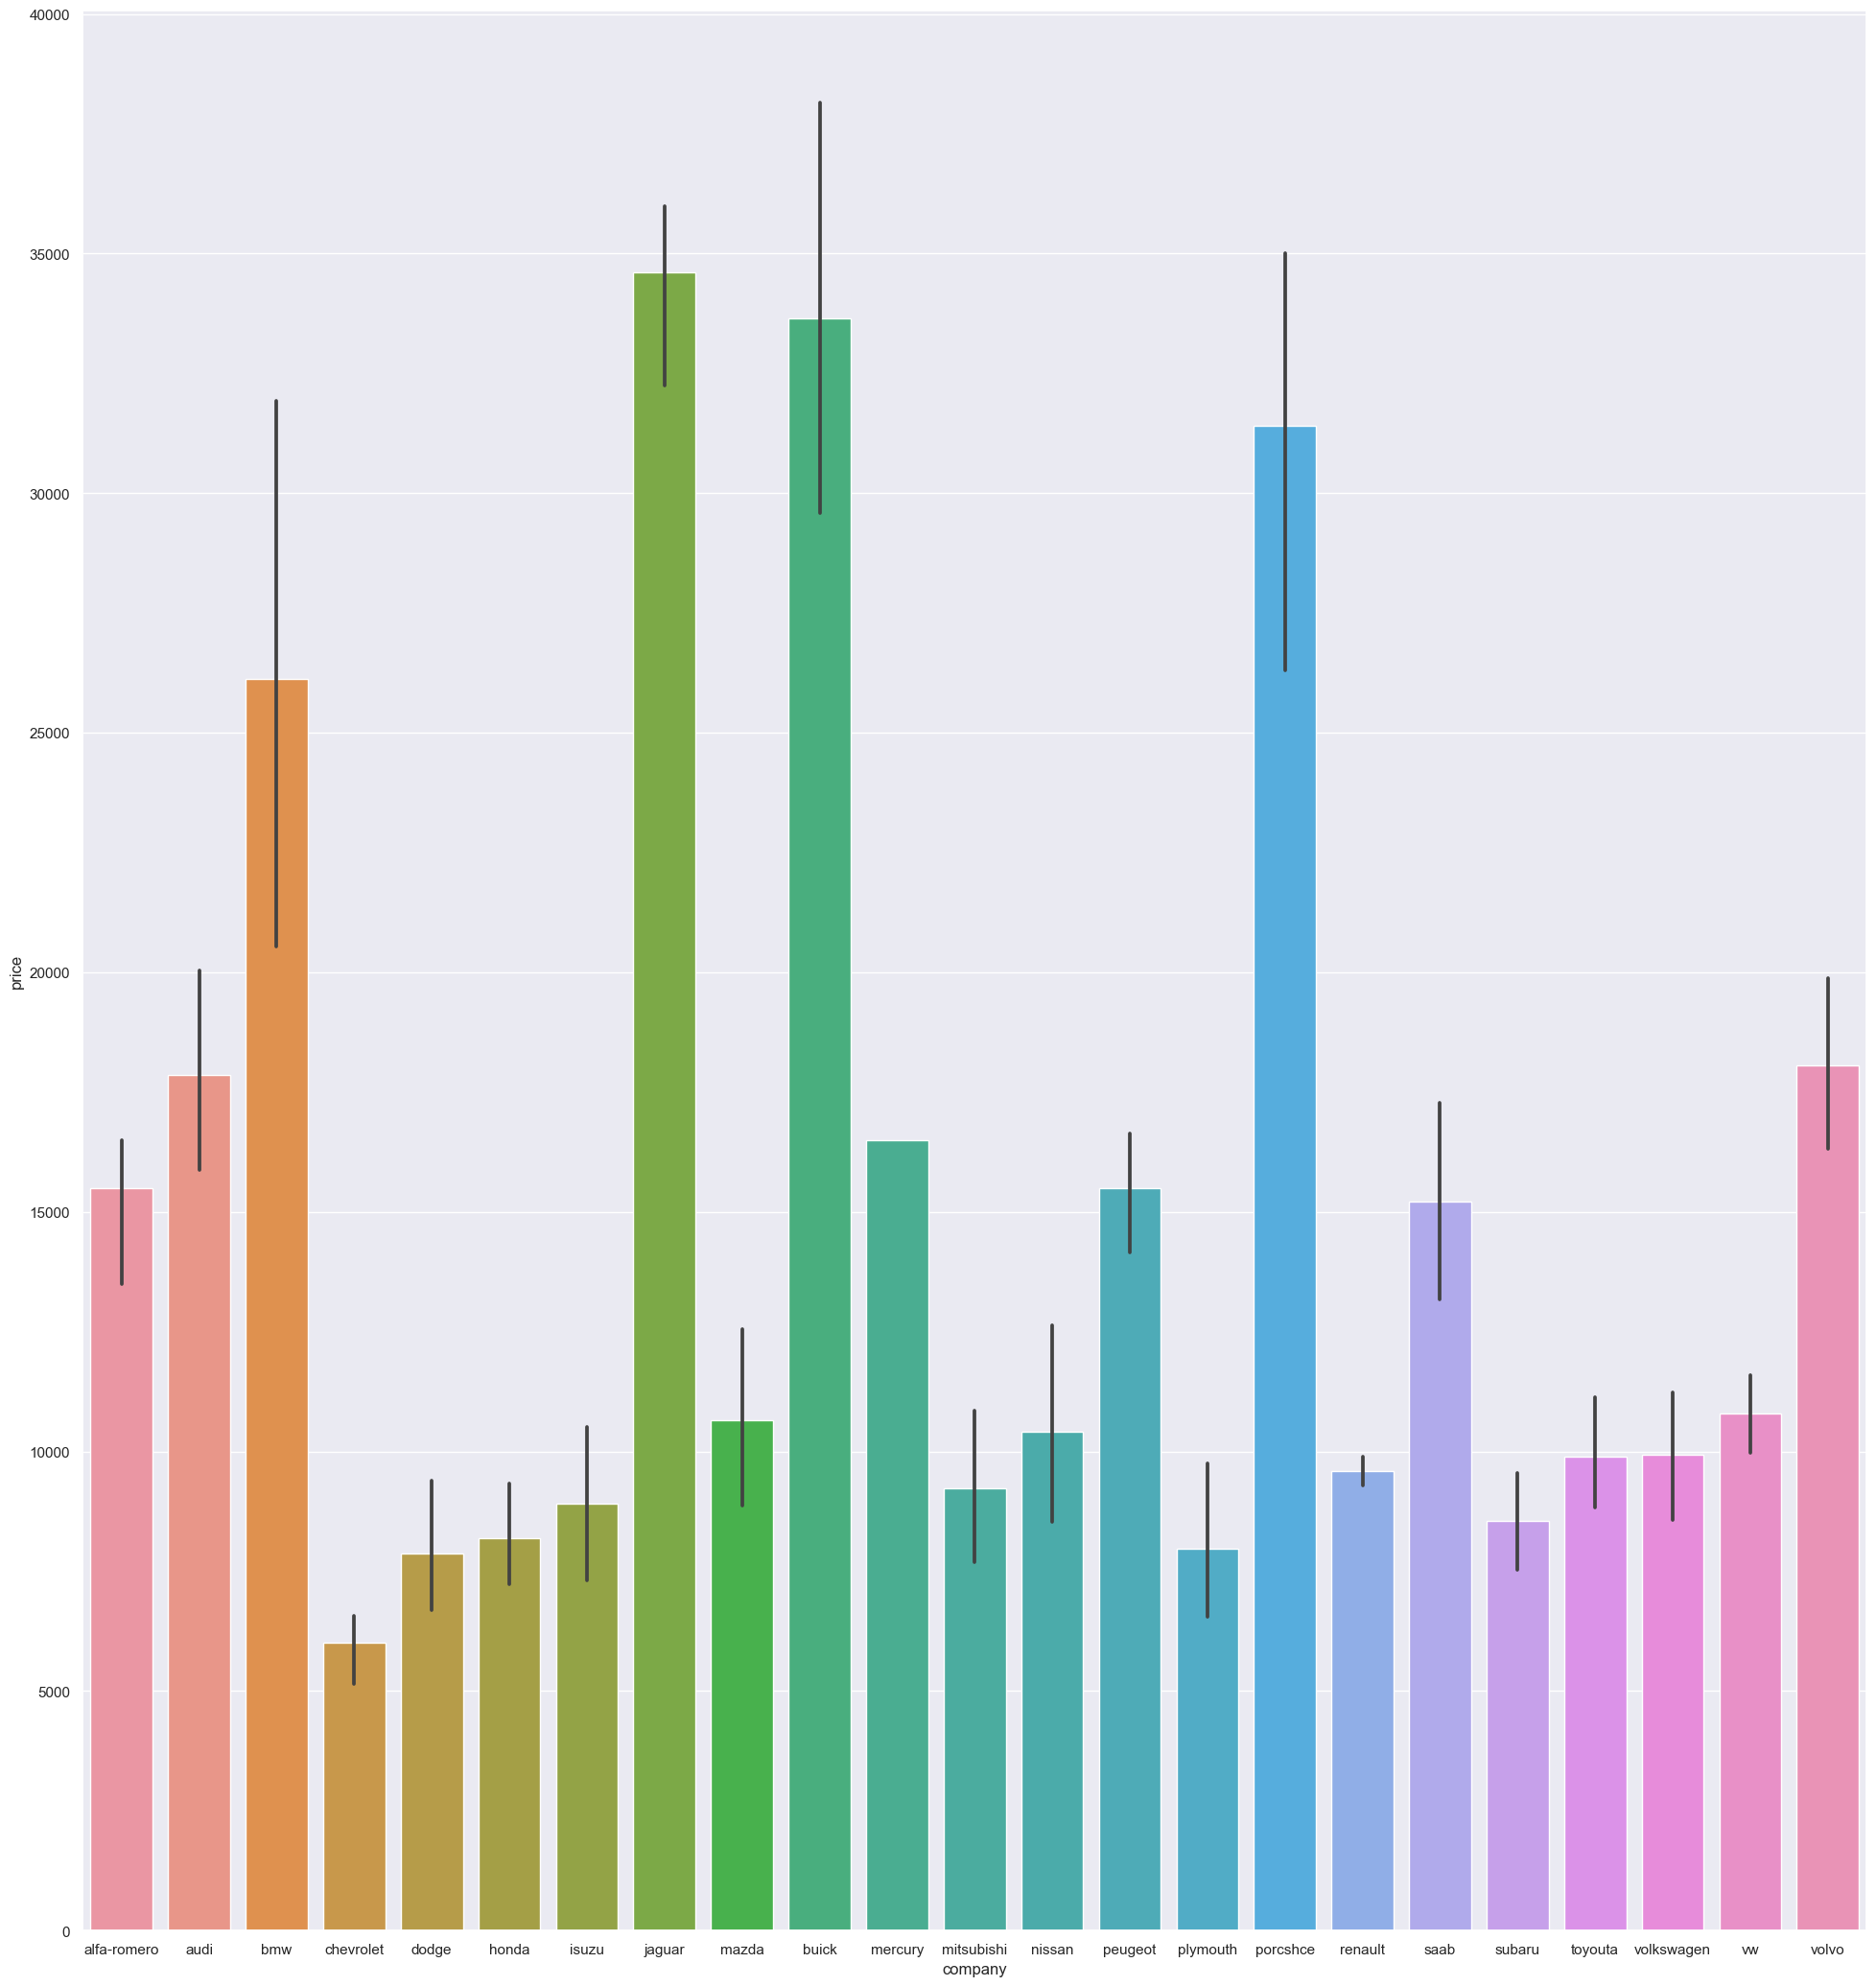

In [17]:
sns.set(rc={"figure.figsize":(24,26)})
sns.barplot(x='company',y='price',data=df)

<AxesSubplot:xlabel='fueltype', ylabel='price'>

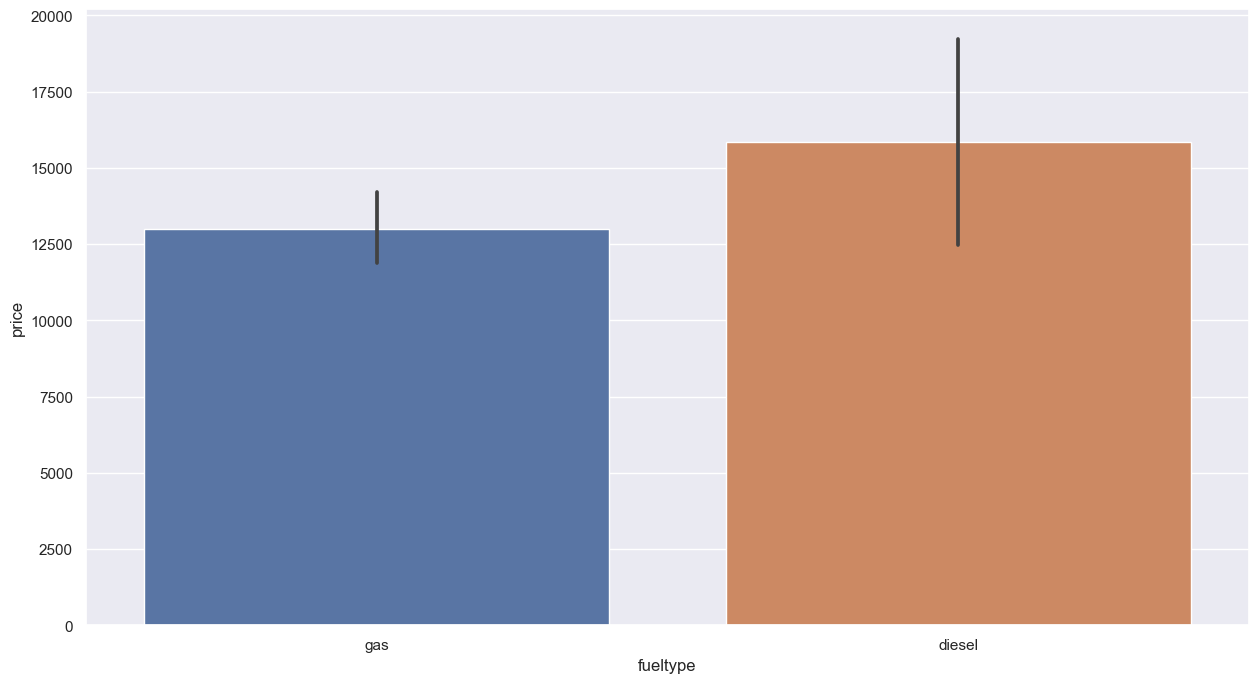

In [18]:
plt.figure(figsize=(15,8))
sns.barplot(x='fueltype',y='price',data=df)

<AxesSubplot:xlabel='cylindernumber', ylabel='count'>

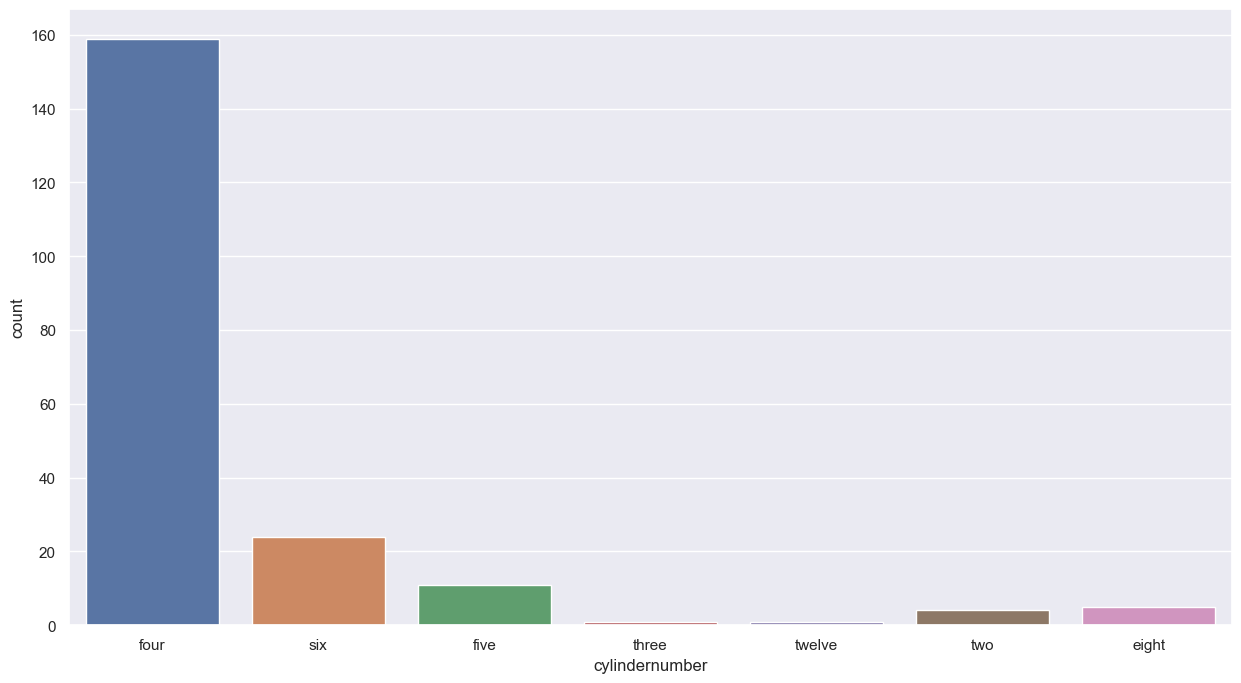

In [19]:
plt.figure(figsize=(15,8))
sns.countplot(x='cylindernumber',data=df)

<AxesSubplot:xlabel='fuelsystem', ylabel='count'>

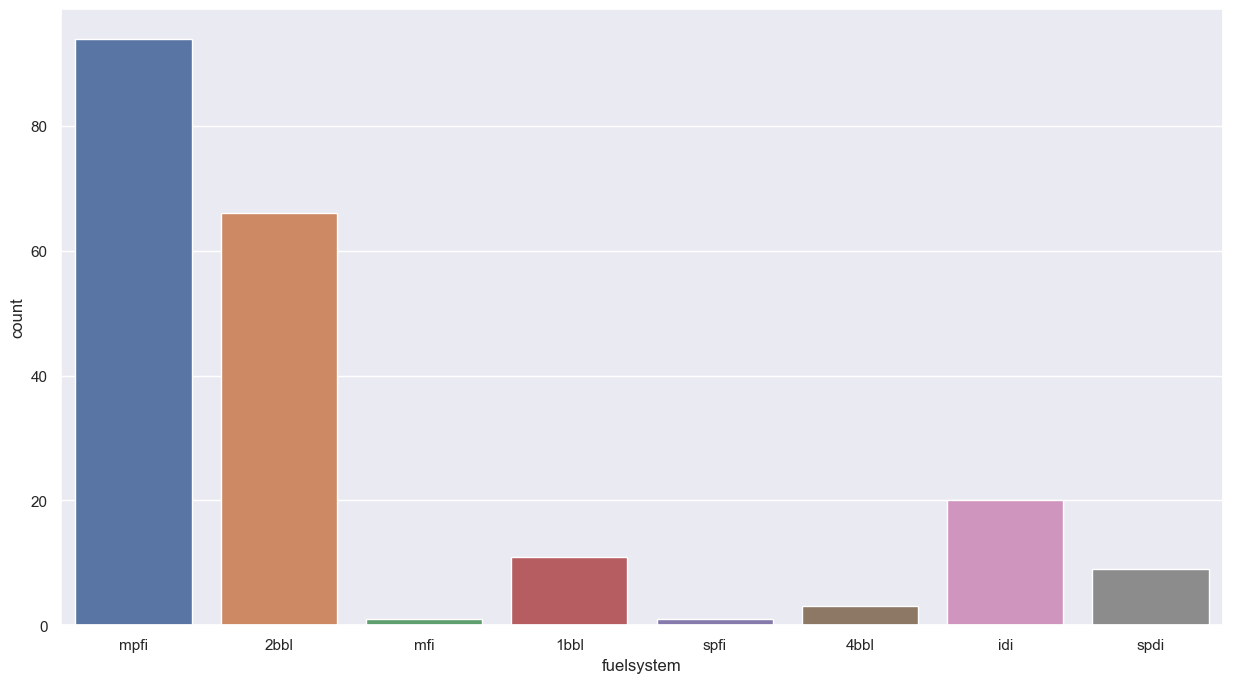

In [20]:
plt.figure(figsize=(15,8))
sns.countplot(x='fuelsystem',data=df)

Assigning only relevent independent variable as x for the prediction of the prices

In [21]:
x = df[['wheelbase',"carlength","carwidth","carheight","curbweight","enginesize","boreratio","stroke",'compressionratio','horsepower']]

In [22]:
x

wheelbase  carlength  carwidth  carheight  curbweight  enginesize  \
0         88.6      168.8      64.1       48.8        2548         130   
1         88.6      168.8      64.1       48.8        2548         130   
2         94.5      171.2      65.5       52.4        2823         152   
3         99.8      176.6      66.2       54.3        2337         109   
4         99.4      176.6      66.4       54.3        2824         136   
..         ...        ...       ...        ...         ...         ...   
200      109.1      188.8      68.9       55.5        2952         141   
201      109.1      188.8      68.8       55.5        3049         141   
202      109.1      188.8      68.9       55.5        3012         173   
203      109.1      188.8      68.9       55.5        3217         145   
204      109.1      188.8      68.9       55.5        3062         141   

     boreratio  stroke  compressionratio  horsepower  
0         3.47    2.68               9.0         111  
1         3.47    2.68               9.0         111  
2         2.68    3.47               9.0         154  
3         3.19    3.40              10.0         102  
4         3.19    3.40               8.0         115  
..         ...     ...               ...         ...  
200       3.78    3.15               9.5         114  
201       3.78    3.15               8.7         160  
202       3.58    2.87               8.8         134  
203       3.01    3.40              23.0         106  
204       3.78    3.15               9.5         114  

[205 rows x 10 columns]

Assigning price in y as dependent variable

In [24]:
y = df.price

In [25]:
y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

Using algorithum like linear Regression and Decision tree for the prediction of the Prices

# Linear Rrgression

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
sc = StandardScaler()

In [30]:
x_train = sc.fit_transform(x_train)

In [31]:
x_test = sc.fit_transform(x_test)

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
lr = LinearRegression()

In [34]:
lr.fit(x_train,y_train)

LinearRegression()

In [35]:
y_pred = lr.predict(x_test)

In [36]:
lr.predict([[88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111]])

array([3456377.81290776])

Checking Accuracy of the data with r2_score

In [37]:
from sklearn.metrics import r2_score

In [38]:
r2_score(y_pred,y_test).round(2)

0.73

Checking the difference between the Acutual valued and Predicted value

In [39]:
p_d = pd.DataFrame({"Actual":y_test,"Predicted":y_pred,'Difference':y_test-y_pred})

In [40]:
p_d

Actual     Predicted    Difference
15   30760.000  26258.628689   4501.371311
9    17859.167  19480.564254  -1621.397254
100   9549.000  11172.076532  -1623.076532
132  11850.000  14248.669223  -2398.669223
68   28248.000  25429.583928   2818.416072
..         ...           ...           ...
56   11845.000   8022.683339   3822.316661
128  37028.000  25025.847882  12002.152118
76    5389.000   7007.286172  -1618.286172
144   9233.000  11297.273079  -2064.273079
104  17199.000  23698.158785  -6499.158785

[62 rows x 3 columns]

# Decision Tree

In [41]:
from sklearn.tree import DecisionTreeRegressor

In [42]:
dtc = DecisionTreeRegressor(max_depth=5,max_leaf_nodes=10,random_state=42)

In [43]:
dtc.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=5, max_leaf_nodes=10, random_state=42)

In [44]:
y_pred = dtc.predict(x_test)

In [45]:
r2_score(y_pred,y_test).round(2)

0.88